<a href="https://colab.research.google.com/github/catoverhat/Predictive-Analytics-for-Business/blob/main/Linear%20regression/Predicting_Diamond_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
diamonds = pd.read_csv('diamonds.csv').iloc[:, 1:]
new_diamonds = pd.read_csv('new-diamonds.csv').iloc[:, 1:]

Check lineality

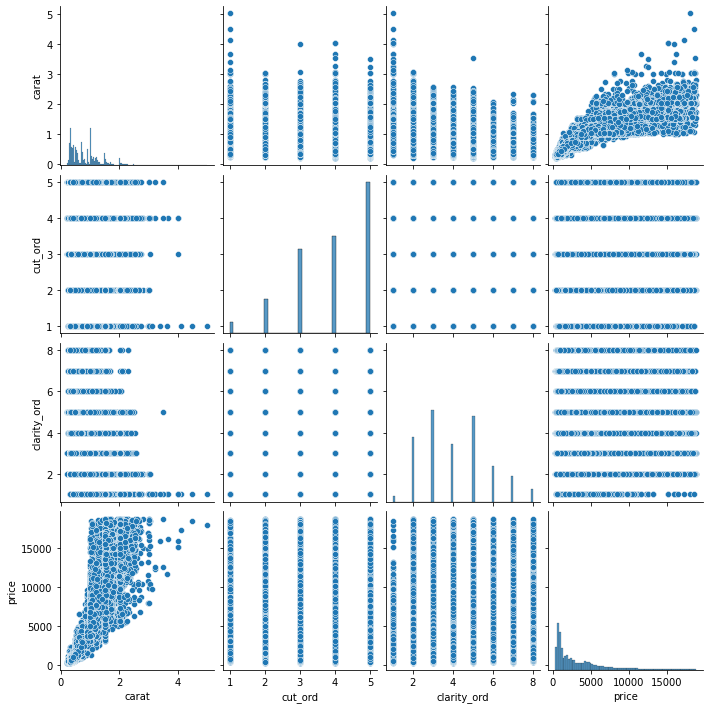

In [33]:
sns.pairplot(diamonds)

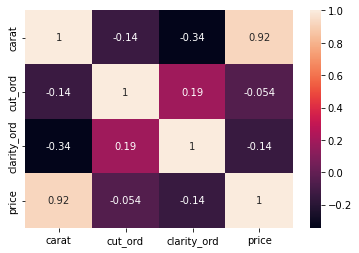

In [22]:
sns.heatmap(diamonds.corr(), annot=True)

In [15]:
diamonds.head()

,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,0.51,Premium,4,F,VS1,4,1749
1,2.25,Fair,1,G,I1,1,7069
2,0.70,Very Good,3,E,VS2,5,2757
3,0.47,Good,2,F,VS1,4,1243
4,0.30,Ideal,5,G,VVS1,7,789


Create dummies

In [42]:
cut_dum = pd.get_dummies(diamonds.cut, prefix='cut').iloc[:, 1:]
color_dum = pd.get_dummies(diamonds.color, prefix='color').iloc[:, 1:]
clarity_dum = pd.get_dummies(diamonds.clarity, prefix='clarity').iloc[:, 1:]
new_cut_dum = pd.get_dummies(new_diamonds.cut, prefix='cut').iloc[:, 1:]
new_color_dum = pd.get_dummies(new_diamonds.color, prefix='color').iloc[:, 1:]
new_clarity_dum = pd.get_dummies(new_diamonds.clarity, prefix='clarity').iloc[:, 1:]

joining all the df into one

In [24]:
df = pd.concat([diamonds, cut_dum, color_dum, clarity_dum], axis=1, join='inner')
df

,carat,cut,cut_ord,color,clarity,clarity_ord,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.51,Premium,4,F,VS1,4,1749,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,2.25,Fair,1,G,I1,1,7069,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.70,Very Good,3,E,VS2,5,2757,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.47,Good,2,F,VS1,4,1243,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.30,Ideal,5,G,VVS1,7,789,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.71,Ideal,5,H,VVS1,7,2918,0,1,0,...,1,0,0,0,0,0,0,0,1,0
49996,0.43,Ideal,5,G,VVS2,6,1056,0,1,0,...,0,0,0,0,0,0,0,0,0,1
49997,1.14,Premium,4,G,VS2,5,6619,0,0,1,...,0,0,0,0,0,0,0,1,0,0
49998,1.01,Premium,4,E,VS2,5,6787,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [49]:
new_df = pd.concat([new_diamonds, new_cut_dum, new_color_dum, new_clarity_dum], axis=1, join='inner')
new_df

,carat,cut,cut_ord,color,clarity,clarity_ord,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.22,Premium,4,G,SI1,3,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1.01,Good,2,G,VS2,5,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.71,Very Good,3,I,VS2,5,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3,1.01,Ideal,5,D,SI2,2,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.27,Ideal,5,H,VVS2,6,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.72,Ideal,5,F,SI2,2,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2996,1.09,Premium,4,I,VS2,5,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2997,1.05,Very Good,3,G,SI1,3,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2998,0.70,Fair,1,G,SI1,3,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [63]:
new_df0 = new_df.drop(['cut', 'cut_ord', 'color', 'clarity', 'clarity_ord'], axis=1).copy()
new_df1 = new_df.drop(['cut', 'color', 'clarity', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'], axis=1).copy()
new_df2 = new_df.drop(['cut', 'color', 'clarity', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'], axis=1).copy()
new_df

,carat,cut,cut_ord,color,clarity,clarity_ord,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.22,Premium,4,G,SI1,3,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1.01,Good,2,G,VS2,5,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.71,Very Good,3,I,VS2,5,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3,1.01,Ideal,5,D,SI2,2,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.27,Ideal,5,H,VVS2,6,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.72,Ideal,5,F,SI2,2,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2996,1.09,Premium,4,I,VS2,5,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2997,1.05,Very Good,3,G,SI1,3,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2998,0.70,Fair,1,G,SI1,3,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [74]:
X = df[['carat', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2']]
X1 = df[['carat', 'cut_ord', 'clarity_ord', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J']]
X2 = df[['carat', 'cut_ord', 'clarity_ord']]
y = df['price']
model = LinearRegression().fit(X, y)
model.score(X,y), model.intercept_

(0.9162528260544507, -7382.290586052183)

In [73]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#coeff_df = pd.DataFrame(model.coef_,X1.columns,columns=['Coefficient'])
#coeff_df = pd.DataFrame(model.coef_,X2.columns,columns=['Coefficient'])
coeff_df

,Coefficient
carat,8887.411940
cut_Good,682.167003
cut_Ideal,1017.090199
cut_Premium,889.256661
cut_Very Good,867.075288
color_E,-205.242761
color_F,-298.671195
color_G,-498.560001
color_H,-966.199475
color_I,-1441.426234


In [77]:
mod = sm.OLS(y, sm.add_constant(X))
results = mod.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 3.038e+04
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        01:59:41   Log-Likelihood:            -4.2360e+05
No. Observations:               50000   AIC:                         8.472e+05
Df Residuals:                   49981   BIC:                         8.474e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7382.2906     53.574   -137.796      0.000   -7487.296   -7277.285
carat          8887.4119     12.475    712.402      0.000    8862.960    8911.864
cut_Good        682.1670     34.881     19.557      0.000     613.799     750.535
cut_Ideal      1017.0902     31.786     31.998      0.000     954.789    1079.391
cut_Premium     889.2567     32.069     27.730      0.000     826.402     952.111
cut_Very Good   867.0753     32.435     26.732      0.000     803.502     930.649
color_E        -205.2428     19.041    -10.779      0.000    -242.564    -167.922
color_F        -298.6712     19.230    -15.532      0.000    -336.361    -260.981
color_G        -498.5600     18.835    -26.470      0.000    -535.476    -461.644
color_H        -966.1995     20.020    -48.262      0.000   -1005.439    -926.960
color_I       -1441.4262     22.435    -64.248      0.000   -1485.400   -1397.452
color_J       -2321.3535     27.745    -83.667      0.000   -2375.734   -2266.973
clarity_IF     5421.7898     54.176    100.078      0.000    5315.605    5527.975
clarity_SI1    3570.5622     46.370     77.002      0.000    3479.677    3661.447
clarity_SI2    2616.8703     46.560     56.204      0.000    2525.612    2708.129
clarity_VS1    4534.6855     47.337     95.796      0.000    4441.905    4627.466
clarity_VS2    4217.1400     46.617     90.464      0.000    4125.771    4308.509
clarity_VVS1   5057.7867     50.122    100.909      0.000    4959.546    5156.027
clarity_VVS2   4953.7411     48.742    101.631      0.000    4858.205    5049.277
==============================================================================
Omnibus:                    14078.910   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           167730.330
Skew:                           1.015   Prob(JB):                         0.00
Kurtosis:                      11.740   Cond. No.                         37.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# print the p-values for the model coefficients
results.pvalues

const             0.000000e+00
carat             0.000000e+00
cut_Good          7.504938e-85
cut_Ideal        2.070598e-222
cut_Premium      5.734783e-168
cut_Very Good    2.502556e-156
color_E           4.638731e-27
color_F           2.829927e-54
color_G          2.451017e-153
color_H           0.000000e+00
color_I           0.000000e+00
color_J           0.000000e+00
clarity_IF        0.000000e+00
clarity_SI1       0.000000e+00
clarity_SI2       0.000000e+00
clarity_VS1       0.000000e+00
clarity_VS2       0.000000e+00
clarity_VVS1      0.000000e+00
clarity_VVS2      0.000000e+00
dtype: float64

In [80]:
predictions = model.predict(new_df0)

In [81]:
sum(predictions) * .7

8230695.689744967

The output of the formula tool should give you an answer of approximately $8,230,695.69, which would be your recommended bid price for the 3000 diamonds.